# Tasks

In [ ]:
# Imports:
# Data Frames.
import pandas as pd
# Machine learning Library that contains example datasets.
import sklearn as skl
# Data visualisation library.
import matplotlib.pyplot as plt
# Numerical python package.
import numpy as np
# Matplot lib colour package.
from matplotlib import colors
# Seaborn data visulisation libarary.
import seaborn as sns
# Scipy scientific computing, statistical module.
import scipy.stats

## Task 1: Loading The Dataset

#### Import the Iris data set from the sklearn.datasets module.

In [3]:
# Loading the iris dataset from the sklearn module:

iris = skl.datasets.load_iris()


References used:
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

Reason:

Here I checked the documentation and saw an option to load the dataset as a data frame. There are many benefits to loading the dataset as a dataframe so I decided to have this option available as it is visually easier to process.

In [4]:
# Loading the iris dataset in a dataframe for ease of comprehension.
df = skl.datasets.load_iris(as_frame=True)
data = df['data']

#### Explain, in your own words, what the load_iris() function returns:

The load_iris() command returns a dataset in dictionary form, originally published by R.A. Fisher in 1936, featuring data on the sepal and petal lengths and widths of different types of iris flower species measured in centimeters.  It contains 150 instances of of the 4 measurements, 50 for each species observed: Iris Setosa, Iris Versicolour and Iris Virginica. It is noted as one of the earliest used datasets in the development of classification methods. It is extremely famous and influential still to this day despite being nearly a century old.

## Task 2: Explore the Data Structure

#### Print and explain the shape of the data set:

In [5]:
# Shape of the data:

data.shape

(150, 4)

The dataset contains 150 instances (rows) of 4 measurements (columns), totalling 600 datapoints.

#### Print the first and last 5 rows of the data:

In [6]:
# The first five rows of the data:

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# The last five rows of the data:

data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


#### Print the feature names and the target classes.

In [8]:
# Printing the feature names:

df['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
# Printing the target classes:

df['target_names'].tolist()

['setosa', 'versicolor', 'virginica']

## Task 3: Summarise the Data

#### For each feature in the dataset, calculate and display:

- mean
- minimum
- maximum
- standard deviation
- median

In [10]:
# Calculate and display mean:

data.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [11]:
# Calculate and display min:

data.min()

sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
dtype: float64

In [12]:
# Calculate and display max:

data.max()

sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64

In [13]:
# Calculate and display standard deviation:

data.std()

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64

In [14]:
# Calculate and display median:

data.median()

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

## Task 4: Visualize Features

#### Plot histograms for each feature using matplotlib.
#### Add appropriate titles and axis labels.

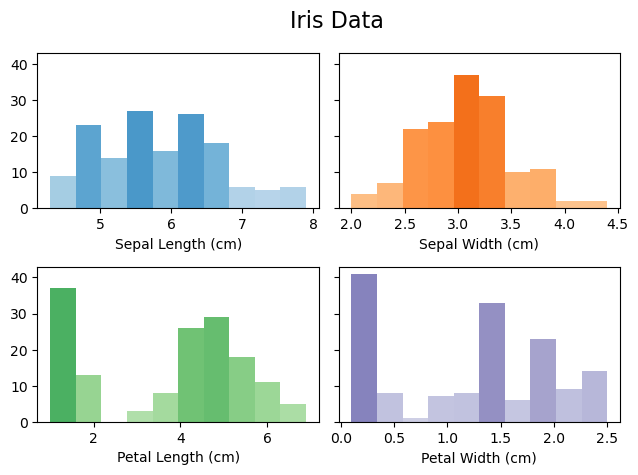

In [15]:
# Storing columns of data as variables.

sepal_length = data['sepal length (cm)']
sepal_width = data['sepal width (cm)']
petal_length = data['petal length (cm)']
petal_width = data['petal width (cm)']

# Creating a 2 by 2 grid of plots that share a y axis 
# with the padding around the plots adjusted. See references.

fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)

# Creating histograms in each of the 4 plots and setting x labels for each.
# The hist function returns 3 elements: 
# N: The values of the histogram bins.
# bins: The edges of the bins.
# patches: Container of individual artists used to create the histogram.

N, bins, patches = axs[0,0].hist(sepal_length)

# Getting a fraction for each bin so they can be colour coded later

fracs = N/N.max()

# Setting the colour map to span the full range of values.

norm = colors.Normalize(fracs.min(), fracs.max())

# Looping through the objects and setting colours for each 
# based on the fractions calculater earlier.
# The fraction has been slightly altered to take just a 
# section of the colour map.

for thisfrac, thispatch in zip(fracs, patches):
    colour = plt.cm.Blues(norm(thisfrac)*0.3+0.3)
    thispatch.set_facecolor(colour)

# Setting label for the axis.

axs[0,0].set_xlabel('Sepal Length (cm)')

# Process repeated for each axis.
N, bins, patches = axs[0,1].hist(sepal_width)
fracs = N/N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    colour = plt.cm.Oranges(norm(thisfrac)*0.3+0.3)
    thispatch.set_facecolor(colour)
axs[0,1].set_xlabel('Sepal Width (cm)')

N, bins, patches = axs[1,0].hist(petal_length)
fracs = N/N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    colour = plt.cm.Greens(norm(thisfrac)*0.3+0.3)
    thispatch.set_facecolor(colour)
axs[1,0].set_xlabel('Petal Length (cm)')

N, bins, patches = axs[1,1].hist(petal_width)
fracs = N/N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    colour = plt.cm.Purples(norm(thisfrac)*0.3+0.3)
    thispatch.set_facecolor(colour)
axs[1,1].set_xlabel('Petal Width (cm)')

# Creating a title and setting fontsize and placement.

plt.suptitle('Iris Data', fontsize=16, x=0.535)
plt.show()

References used:

- https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py

I used this tutorial to get some inspiration as to how to create plots most effectively and how best to organise my code.

- https://matplotlib.org/stable/gallery/statistics/hist.html

Here I checked examples of histogram uses to see how they were used and to see if there were any options I wanted to include in my implementation. 

I implemented some of the colour selection from the example and edited it to include the colours I plan to use in this series of tasks.

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

I checked the documentation for pyplot.hist to understand what the function returns and to understand the implemented code better.

- https://matplotlib.org/stable/users/explain/colors/colormaps.html

The colormaps documentation contains examples of the available colour maps. I used it to make an decision about which colour mapping I would like to use in this case.

- https://stackoverflow.com/questions/30019671/why-does-my-xlabel-not-show-up-its-not-getting-cut-off

I found this page while trying to research why some of the axis labels were not displaying properly. From this I took the tight_layout=True option when creating the axes. It helped to display the axes labels.

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots

This reference contains the documentation for subplots. It helped me to set up four individual axes in one figure. It made me aware of the sharey option which was implemented here.

- https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/figure_title.html

This example helped me to get neater title text and to understand how to set figure and axis titles.

## Task 5: Scatter Plot

#### Choose any two features from the data set and create a scatter plot of them.  
#### Color-code the three different classes of the scatter plot points.

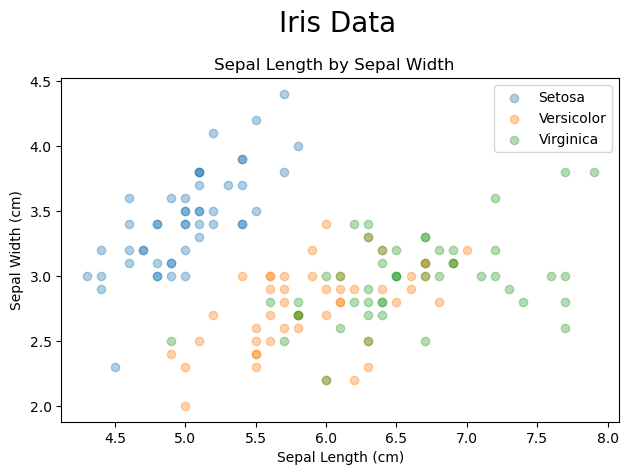

In [16]:
# Creating a single plot with adjusted padding.

fig, ax = plt.subplots(tight_layout=True)

# Creating scatter plots for each of the target variables in different colours on the same axis.
# Using c= to set marker colour and label for each variable rather than using colour mapping.

ax.scatter(sepal_length[0:49], sepal_width[0:49], c='tab:blue', label='Setosa', alpha=0.35)
ax.scatter(sepal_length[50:99], sepal_width[50:99], c='tab:orange', label='Versicolor', alpha=0.35)
ax.scatter(sepal_length[100:149], sepal_width[100:149], c='tab:green', label='Virginica', alpha=0.35)

# Setting labels for the axis.

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')

# Displaying legend.

ax.legend()

# Setting title for figure and plot.

plt.suptitle('Iris Data', fontsize=20, x=0.535)
plt.title('Sepal Length by Sepal Width', x=0.49)
plt.show()

References used:

- https://matplotlib.org/stable/gallery/color/named_colors.html

I used this reference to implement colours for each species of iris in the scatter plot.

# Task 6: Analyze Relationship

#### Use numpy.polyfit to add a regression line to the scatter plot from Task 5.

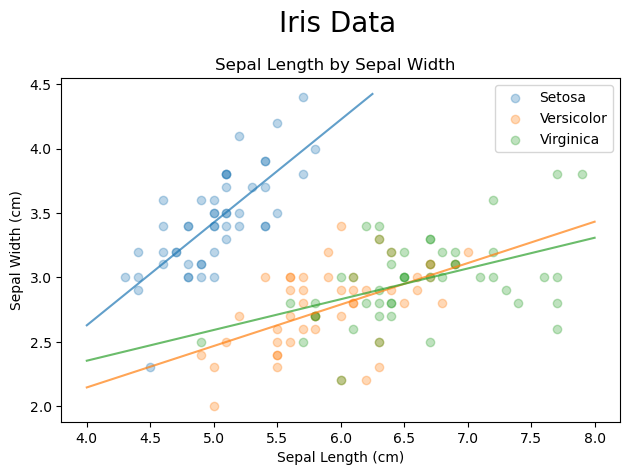

In [17]:
# Creating figure.

fig, ax = plt.subplots(tight_layout=True)

# Creating lines of best fit, using new method (see below).

p1 = np.polynomial.Polynomial.fit(sepal_length[0:49], sepal_width[0:49], 1)
p2 = np.polynomial.Polynomial.fit(sepal_length[50:99], sepal_width[50:99], 1)
p3 = np.polynomial.Polynomial.fit(sepal_length[100:149], sepal_width[100:149], 1)

# Creating x values for best fit lines.

xp1 = np.linspace(4, 6.25, 2)
xp2 = np.linspace(4, 8, 2)
xp3 = np.linspace(4, 8, 2)

# Plots.

ax.scatter(sepal_length[0:49], sepal_width[0:49], c='tab:blue', label='Setosa', alpha=0.3)
plt.plot(xp1, p1(xp1), '-', alpha=0.7)
ax.scatter(sepal_length[50:99], sepal_width[50:99], c='tab:orange', label='Versicolor', alpha=0.3)
plt.plot(xp2, p2(xp2), '-', alpha=0.7)
ax.scatter(sepal_length[100:149], sepal_width[100:149], c='tab:green', label='Virginica', alpha=0.3)
plt.plot(xp3, p3(xp3), '-', alpha=0.7)

# Setting axes labels.

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')

# Displaying legend.

ax.legend()

# Setting title for figure and plot.

plt.suptitle('Iris Data', fontsize=20, x=0.535)
plt.title('Sepal Length by Sepal Width', x=0.49)
plt.show()

In [18]:
c4, m4 = p1.convert()

print(p1.convert())
print(m4,"= m4")
print(c4,"= c4")

-0.56629794 + 0.7984044 x
0.79840439796192 = m4
-0.5662979351032416 = c4


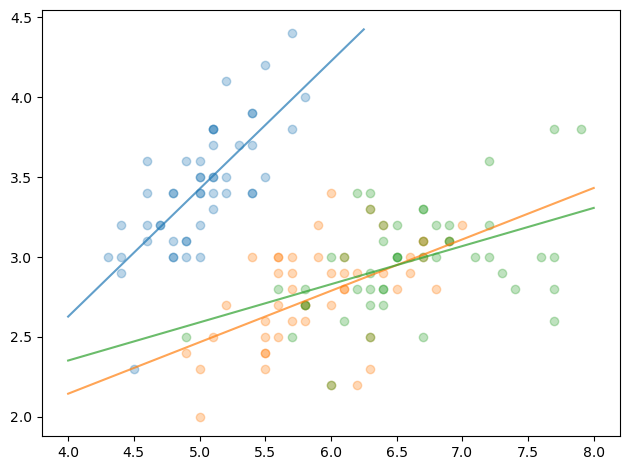

In [19]:
# Creating figure.

fig, ax = plt.subplots(tight_layout=True)

# Using numpy.polyfit

m1, c1 = np.polyfit(sepal_length[0:49], sepal_width[0:49], 1)
m2, c2 = np.polyfit(sepal_length[50:99], sepal_width[50:99], 1)
m3, c3 = np.polyfit(sepal_length[100:149], sepal_width[100:149], 1)

xp1 = np.linspace(4, 6.25, 2)
xp2 = np.linspace(4, 8, 2)
xp3 = np.linspace(4, 8, 2)

# Plots.

ax.scatter(sepal_length[0:49], sepal_width[0:49], c='tab:blue', label='Setosa', alpha=0.3)
ax.plot(xp1, m1*xp1+c1, alpha=0.7)
ax.scatter(sepal_length[50:99], sepal_width[50:99], c='tab:orange', label='Versicolor', alpha=0.3)
ax.plot(xp2, m2*xp2+c2, alpha=0.7)
ax.scatter(sepal_length[100:149], sepal_width[100:149], c='tab:green', label='Virginica', alpha=0.3)
ax.plot(xp3, m3*xp3+c3, alpha=0.7)

References used: 

- https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
- https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html

These references were used to fit lines of best fit on the above figure. Both the documentation and the examples were extremely helpful. However the documentation recommended using the new method.

- https://numpy.org/doc/stable/reference/routines.polynomials.html

This reference explained how to change from the old method to the new method.

The two options here are as follows:

1. Legacy polynomial module, np.polyfit:

```p1 = np.poly1d(np.polyfit(sepal_length[0:49],sepal_width[0:49], 1))```

2. Updated polynomial API:

```p1 = np.polynomial.Polynomial.fit(sepal_length[0:49],sepal_width[0:49], 1)```




# Task 7: Analyze Class Distributions

#### Create box-plots of the petal lengths for each of the three classes.

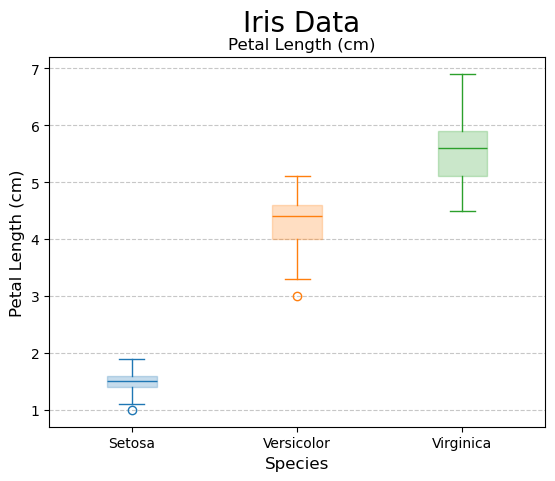

In [20]:
# Creating figure.

fig, ax = plt.subplots()

# Creating NumPy array for boxplot.

petal_length_by_species = np.array([petal_length[0:49], petal_length[50:99], petal_length[100:149]])

# Creating boxplot, using transposed array and coloured boxes.

bp = ax.boxplot(petal_length_by_species.T, patch_artist=True)

# Individual boxplot colour settings in returned dictionary.

bp['medians'][0].set_color('tab:blue')
bp['boxes'][0].set_color('tab:blue')
bp['boxes'][0].set_alpha(0.25)
bp['whiskers'][0].set_color('tab:blue')
bp['whiskers'][1].set_color('tab:blue')
bp['caps'][0].set_color('tab:blue')
bp['caps'][1].set_color('tab:blue')
bp['fliers'][0].set_markeredgecolor('tab:blue')
bp['medians'][1].set_color('tab:orange')
bp['boxes'][1].set_color('tab:orange')
bp['boxes'][1].set_alpha(0.25)
bp['whiskers'][2].set_color('tab:orange')
bp['whiskers'][3].set_color('tab:orange')
bp['caps'][2].set_color('tab:orange')
bp['caps'][3].set_color('tab:orange')
bp['fliers'][1].set_markeredgecolor('tab:orange')
bp['medians'][2].set_color('tab:green')
bp['boxes'][2].set_color('tab:green')
bp['boxes'][2].set_alpha(0.25)
bp['whiskers'][4].set_color('tab:green')
bp['whiskers'][5].set_color('tab:green')
bp['caps'][4].set_color('tab:green')
bp['caps'][5].set_color('tab:green')

# Setting labels and titles.

plt.suptitle('Iris Data', fontsize=20, x=0.52)
ax.set_title("Petal Length (cm)", fontsize=12, x=0.51)
ax.set_xlabel("Species", fontsize=12)
ax.set_ylabel("Petal Length (cm)", fontsize=12)

# Labelling each group.

ax.set_xticks([1, 2, 3], ["Setosa", "Versicolor", "Virginica"], fontsize=10)

# Adding grid lines.

ax.grid(axis="y", linestyle="--", alpha=0.7)

# Show figure.

plt.show()

References used:

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

Exploring the boxplot documentation to understand what it returns, how to access individual settings, best practices and the available options while creating box plots.

- https://numpy.org/doc/stable/reference/generated/numpy.array.html

Here I checked the documentation for a numpy array so I could properly create an array that could be used by the boxplot function.

- https://matplotlib.org/stable/gallery/statistics/boxplot_color.html
- https://stackoverflow.com/questions/35160956/pandas-boxplot-set-color-and-properties-for-box-median-mean
- https://stackoverflow.com/questions/43342564/flier-colors-in-boxplot-with-matplotlib

These references helped me to understand how to colour the individual parts of the box plots.


# Task 8: Compute Correlations

#### Calculate the correlation coefficients between the features.

In [21]:
setosa_corr = data[0:49].corr()

setosa_corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.743312,0.267405,0.278498
sepal width (cm),0.743312,1.000000,0.175631,0.230413
petal length (cm),0.267405,0.175631,1.000000,0.329476
petal width (cm),0.278498,0.230413,0.329476,1.000000


In [22]:
versicolor_corr = data[50:99].corr()

versicolor_corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.528022,0.753357,0.546498
sepal width (cm),0.528022,1.000000,0.561932,0.664443
petal length (cm),0.753357,0.561932,1.000000,0.786828
petal width (cm),0.546498,0.664443,0.786828,1.000000


In [23]:
virginica_corr = data[100:149].corr()

virginica_corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.464776,0.862317,0.267722
sepal width (cm),0.464776,1.000000,0.405287,0.542988
petal length (cm),0.862317,0.405287,1.000000,0.312459
petal width (cm),0.267722,0.542988,0.312459,1.000000


References used:

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

The corr method in pandas computes pairwise correlation of columns, excluding NA/null values. It's default method is to calculate the pearson correlation coefficient.

#### Display the results as a heatmap using matplotlib.

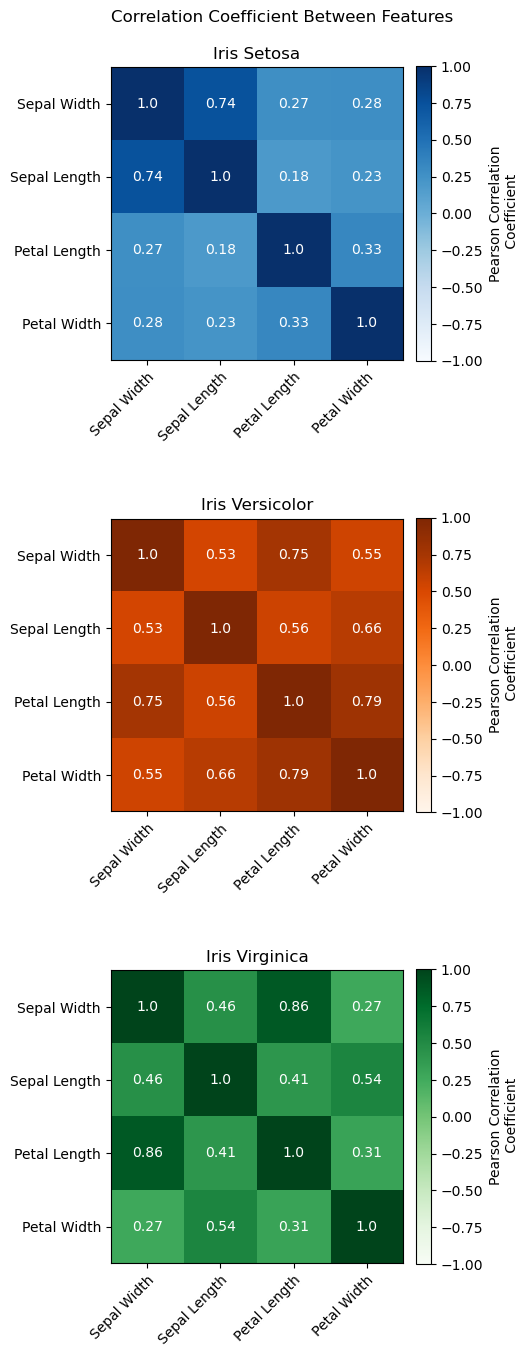

In [24]:
# Creating feature name list.

feature_names = ["Sepal Width", "Sepal Length", "Petal Length", "Petal Width"]

# Turning correlation coefficient dataframes into arrays and rounding to 2 decimal places.

array_setosa = np.array(setosa_corr.round(2))
array_versicolor = np.array(versicolor_corr.round(2))
array_virginica = np.array(virginica_corr.round(2))

# Creating 3 subplots.

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 14))

# Setting figure title and layout.

fig.suptitle("Correlation Coefficient Between Features")

# Setting x and y labels for axes.

for ax in [ax1, ax2, ax3]:
    ax.set_xticks(range(len(feature_names)), labels=feature_names,
                rotation=45, ha="right", rotation_mode="anchor")
    ax.set_yticks(range(len(feature_names)), labels=feature_names)

# Creating heatmap and colourbar.
# Setting colourmap, min and max values for colourbar.
# Setting colourbar size and label

im1 = ax1.imshow(array_setosa, cmap='Blues', vmin=-1, vmax=1)
cb1 = ax1.figure.colorbar(im1, fraction=0.046, pad=0.04, label='Pearson Correlation\n Coefficient')

# Labeling heatmap sections.

for i in range(len(feature_names)):
    for j in range(len(feature_names)):
        text = ax1.text(j, i, array_setosa[i, j],
                       ha="center", va="center", color="w")
        
# Adding title for axis.

ax1.set_title("Iris Setosa")

# Repeating above for each species.

im2 = ax2.imshow(array_versicolor, cmap='Oranges', vmin=-1, vmax=1)
cb2 = ax2.figure.colorbar(im2, fraction=0.046, pad=0.04, label='Pearson Correlation\n Coefficient')

for i in range(len(feature_names)):
    for j in range(len(feature_names)):
        text = ax2.text(j, i, array_versicolor[i, j],
                       ha="center", va="center", color="w")
        
ax2.set_title("Iris Versicolor")

im3 = ax3.imshow(array_virginica, cmap='Greens', vmin=-1, vmax=1)
cb3 = ax3.figure.colorbar(im3, fraction=0.046, pad=0.04, label='Pearson Correlation\n Coefficient')

for i in range(len(feature_names)):
    for j in range(len(feature_names)):
        text = ax3.text(j, i, array_virginica[i, j],
                       ha="center", va="center", color="w")
        
ax3.set_title("Iris Virginica")

fig.tight_layout()
plt.show()

References used:

- https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

I used this reference to find best practice for creating heatmaps. 

- https://stackabuse.com/calculating-pearson-correlation-coefficient-in-python-with-numpy/

This reference was used to understand how to find pearson correlation coefficient in python.

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html

The documentation for colour bars helped me to set the limits and labels for the colour bar.


# Task 9: Fit a Simple Linear Regression

#### For your two features in Task 5, calculate the coefficient of determination $R^2$.

- https://en.wikipedia.org/wiki/Coefficient_of_determination

In statistics, the coefficient of determination, denoted $R^2$ or $r^2$ and pronounced "R squared", is the proportion of the variation in the dependent variable that is predictable from the independent variable(s).

- https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions

A data set has n values marked $y_1, \ldots, y_n$ (collectively known as $y_i$ or as a vector $\textbf{y} = [y_1, \ldots, y_n]^T)$, each associated with a fitted (or modeled, or predicted) value $f1, ..., fn$ (known as $fi$, or sometimes $\hat{y}i$, as a vector $\textbf{f}$).

Define the residuals as $e_i = y_i − f_i$ (forming a vector $\textbf{e}$).

If 
${\displaystyle {\bar {y}}}$ is the mean of the observed data:

$\displaystyle \bar{y} = \frac{1}{n}\sum_{i=1}^n y_i$

then the variability of the data set can be measured with two sums of squares formulas:

The sum of squares of residuals, also called the residual sum of squares:

${\displaystyle SS_{\text{res}}=\sum _{i}(y_{i}-f_{i})^{2}=\sum _{i}e_{i}^{2}\,}$

The total sum of squares (proportional to the variance of the data):

${\displaystyle SS_{\text{tot}}=\sum _{i}(y_{i}-{\bar {y}})^{2}}$

The most general definition of the coefficient of determination is

${\displaystyle R^{2}=1-{SS_{\rm {res}} \over SS_{\rm {tot}}}}$

In the best case, the modeled values exactly match the observed values, which results in ${\displaystyle SS_{\text{res}}=0}$ and $R^2$ = 1. A baseline model, which always predicts $\bar{y}$, will have $R^2 = 0$.

##### Finding $\bar{y}$

$\displaystyle \bar{y} = \frac{1}{n}\sum_{i=1}^n y_i$

In [25]:
y = sepal_width[0:49]
y_bar = (1 / len(y) ) * np.sum(y)

y_bar

3.430612244897959

##### Finding ${\displaystyle SS_{\text{res}}}$

${\displaystyle SS_{\text{res}}=\sum _{i}(y_{i}-f_{i})^{2}=\sum _{i}e_{i}^{2}\,}$

In [26]:
x = sepal_length[0:49]

p = np.polynomial.polynomial.Polynomial.fit(x, y, 1)

SS_res = np.sum((y - p(x)) ** 2)

SS_res

3.1431844998659173

##### Finding ${\displaystyle SS_{\text{tot}}}$

${\displaystyle SS_{\text{tot}}=\sum _{i}(y_{i}-{\bar {y}})^{2}}$

In [27]:
SS_tot = np.sum((y - y_bar) ** 2)

SS_tot

7.024081632653061

##### Finding ${\displaystyle R^{2}}$

${\displaystyle R^{2}=1-{SS_{\rm {res}} \over SS_{\rm {tot}}}}$

In [28]:
R_2 = 1 - (SS_res / SS_tot)

R_2

0.5525131021749377

- https://stackoverflow.com/questions/893657/how-do-i-calculate-r-squared-using-python-and-numpy

Using the formula from the reference above, simplified with updated syntax we get the following function:

In [29]:
def get_r2_numpy(x, y):
    p = np.polynomial.polynomial.Polynomial.fit(x, y, 1)
    r_squared = 1 - (np.sum((y - p(x)) ** 2) / np.sum((y - y_bar) ** 2))
    return r_squared

get_r2_numpy(x, y)

0.5525131021749377

- https://www.statology.org/r-squared-in-python/

This means that 55.25% of the variation in the sepal width can be explained by the sepal length of the setosa iris flowers.

In general, models with higher R-squared values are preferred because it means the set of predictor variables in the model is capable of explaining the variation in the response variable well.

Another way to calculate this value would be to square the pearson correlation coefficient. 

In [36]:
setosa_r2 = (setosa_corr ** 2)

setosa_r2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.552513,0.071506,0.077561
sepal width (cm),0.552513,1.000000,0.030846,0.053090
petal length (cm),0.071506,0.030846,1.000000,0.108554
petal width (cm),0.077561,0.053090,0.108554,1.000000


In [37]:
setosa_r2.iloc[0,1]

0.5525131021749373

A further way to get this value would be to use scipy to get the r value and then square it.

In [40]:
scipy.stats.linregress(x,y).rvalue ** 2

0.5525131021749374

All of these methods produce the same value differing only by minute degrees as they all use different methods of finding the same value.

#### Re-create the plot from Task 6 and annotate it with the $R^2$ value.

Here I will use the first method. I still have the R_2 variable saved from the above workings and will use it here. I will also use the polynomial for my line of best fit p from the previous example.

Text(4.6, 4.0, '$R^2 =$0.55')

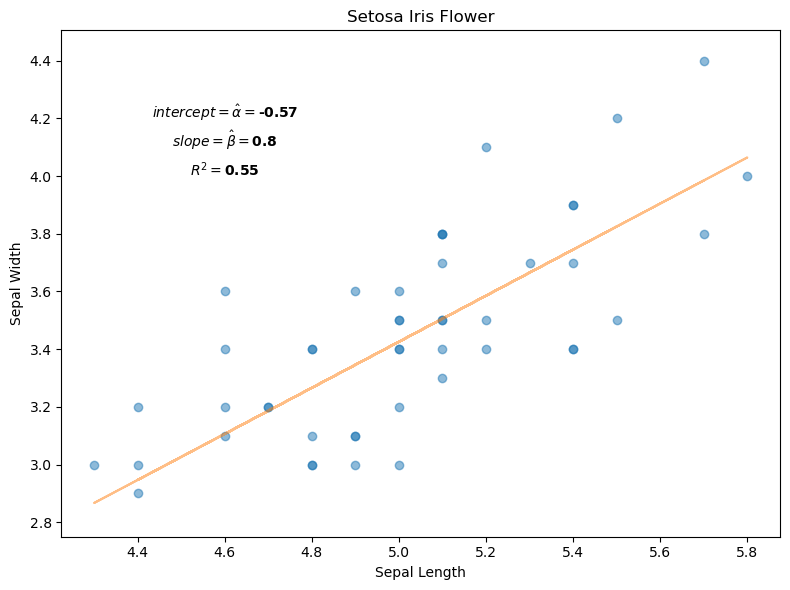

In [ ]:
# Creating scatter plot with line of best fit.

fig, ax = plt.subplots(figsize=(8,6), tight_layout=True)
plt.scatter(x, y, marker = 'o', color = 'tab:blue', alpha=0.5)
plt.plot(x, p(x), color="tab:orange", alpha=0.5)

# Adding tite and axes labels.

plt.title('Setosa Iris Flower')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Limiting the y axis for a neater plot.

plt.ylim(2.75)

# Add the parameters
# Taken from https://python-graph-gallery.com/556-visualize-linear-regression/
# Using line of best fit polynomial p from previous example.
beta0 = r'$intercept = \hat{\alpha} =$' + str(round(p(0),2))
ax.text(4.6, 4.2, beta0, fontsize=10, weight='bold', horizontalalignment='center')

beta1 = r'$slope = \hat{\beta} =$' + str(round(p(1)-p(0),2))
ax.text(4.6, 4.1, beta1, fontsize=10, weight='bold', horizontalalignment='center')

# Using R_2 variable from previous example.
r_squared = r'$R^2 =$' + str(round(R_2,2))
ax.text(4.6, 4.0, r_squared, fontsize=10, weight='bold', horizontalalignment='center')

# Task 10

## Use seaborn to create a pairplot of the data set.

In order to get the best out of a seaborn pairplot, I will require a dataframe that has the target names as a column in the data. To do this I will need to first create a dataframe with the correct target names and then join that onto my existing dataframe containing all the information on the observed features.

In [32]:
# Getting target value array

target_names = iris['target']

# Replacing target number with species name

target_names = [str(w).replace('0', 'Setosa') for w in target_names]
target_names = [str(w).replace('1', 'Versicolor') for w in target_names]
target_names = [str(w).replace('2', 'Virginica') for w in target_names]

# Creating a dataframe from the array

target_names = pd.DataFrame(target_names, columns=['target names'])

# Adding new column to dataframe

df_with_target = data.join(target_names)

References used:

- https://stackoverflow.com/questions/3136689/find-and-replace-string-values-in-list

I used this reference to find the best way of replacing string values in a list when replacing the target numbers with species names.


Seaborn is very powerful and can create complex plots and figures from very little code as long as the data it is working with is correctly layed out. After joining the feature names onto the data I can call hue='target names' which will colour the data by feature.

Seaborn automatically creates these plots based on this data, includes a legend and labels the axes.

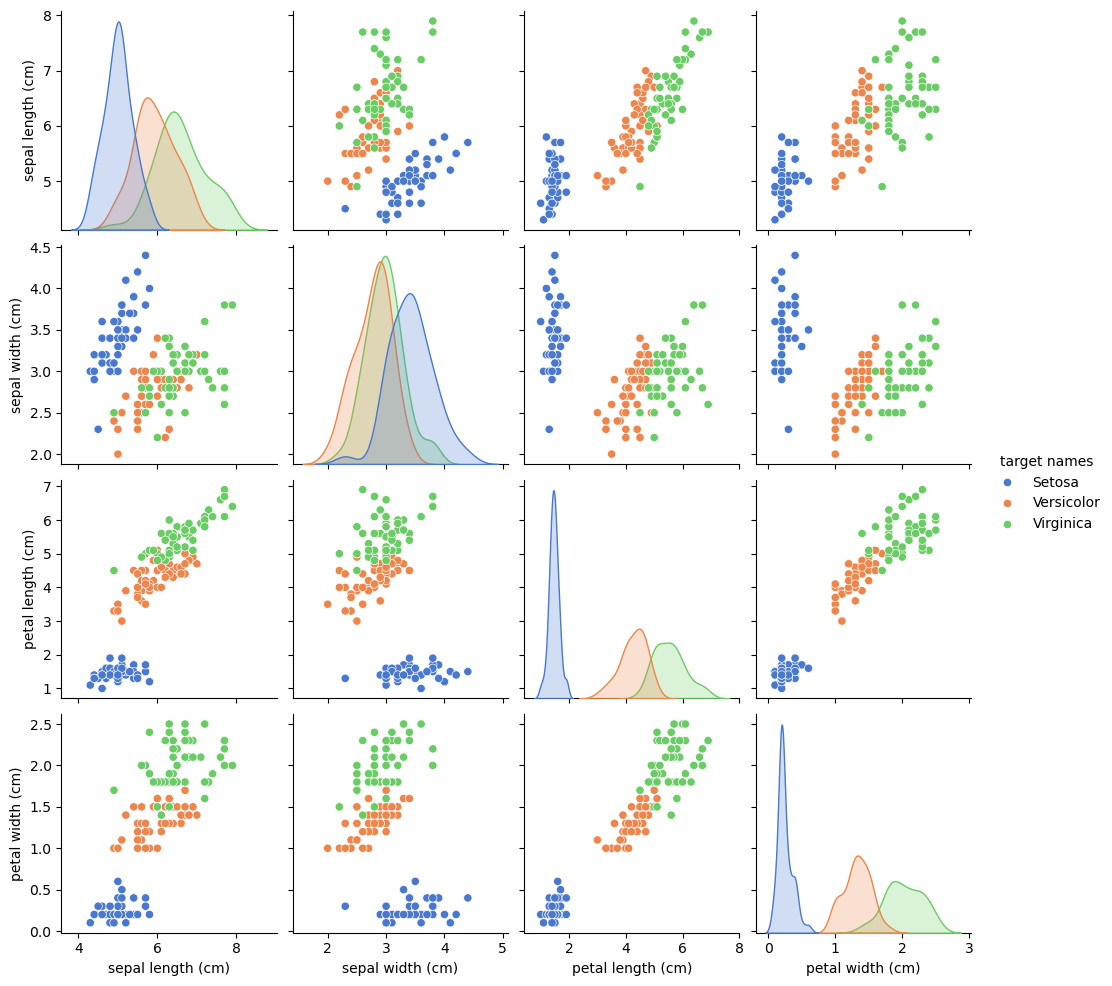

In [33]:
sns.pairplot(df_with_target, hue='target names', palette='muted')


References used:

- https://seaborn.pydata.org/tutorial/color_palettes.html#qualitative-color-palettes

This reference helped to choose the best pallette for the pairplot. 

## Explain, in your own words, what the pairplot depicts.

Pairplot displays pairwise scatter plots of each of the pairs of features. There are also kernel density plots for plots with a single feature, where a feature has been paired with itself. It has also separated the features by colour.

The plots are mirrored across the diagonal; the second plot in the first row is the same as the first plot in the second row but mirrored around x = y as the features are the same but on different axes.

Where the same feature is on both axes a kernel density plot shows how the data is distributed across the axis.

As you can see for most features the iris setosa can be separated from the versicolor and virginica, especially in the petal width and length.

One thing to note is that the y scale for the kernel density plots and the scatter plots does not match, but has been scaled so that the plot fits well.

## End